<a href="https://colab.research.google.com/github/MahimnaDarji/Cricket-Analysis/blob/main/IPL%20Stats%20Analysis(Batting).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#IPL Batting Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
deliveries=pd.read_csv('/content/drive/MyDrive/DATASETS/deliveries_updated_mens_ipl.csv')

In [3]:
deliveries.head(2)

,matchId,inning,over_ball,over,ball,batting_team,bowling_team,batsman,non_striker,bowler,batsman_runs,extras,isWide,isNoBall,Byes,LegByes,Penalty,dismissal_kind,player_dismissed
0,1082591,1,0.1,0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,S Dhawan,TS Mills,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1082591,1,0.2,0,2,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,S Dhawan,TS Mills,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
def balls_per_dismissal(balls, dismissals):
    if dismissals > 0:
        return balls/dismissals
    else:
        return balls/1 
    
def balls_per_boundary(balls, boundaries):
    if boundaries > 0:
        return balls/boundaries
    else:
        return balls/1 

def playerStatistics(df):
    
    df['isDot'] = df['batsman_runs'].apply(lambda x: 1 if x == 0 else 0)
    df['isOne'] = df['batsman_runs'].apply(lambda x: 1 if x == 1 else 0)
    df['isTwo'] = df['batsman_runs'].apply(lambda x: 1 if x == 2 else 0)
    df['isThree'] = df['batsman_runs'].apply(lambda x: 1 if x == 3 else 0)
    df['isFour'] = df['batsman_runs'].apply(lambda x: 1 if x == 4 else 0)
    df['isSix'] = df['batsman_runs'].apply(lambda x: 1 if x == 6 else 0)
    
    runs = pd.DataFrame(df.groupby(['batsman'])['batsman_runs'].sum().reset_index()).rename(columns={'batsman_runs':'runs'})
    innings = pd.DataFrame(df.groupby(['batsman'])['matchId'].apply(lambda x: len(list(np.unique(x)))).reset_index()).rename(columns = {'matchId':'innings'})
    balls = pd.DataFrame(df.groupby(['batsman'])['matchId'].count()).reset_index().rename(columns = {'matchId':'balls'})
    dismissals = pd.DataFrame(df.groupby(['batsman'])['player_dismissed'].count()).reset_index().rename(columns = {'player_dismissed':'dismissals'})
    
    dots = pd.DataFrame(df.groupby(['batsman'])['isDot'].sum()).reset_index().rename(columns = {'isDot':'dots'})
    ones = pd.DataFrame(df.groupby(['batsman'])['isOne'].sum()).reset_index().rename(columns = {'isOne':'ones'})
    twos = pd.DataFrame(df.groupby(['batsman'])['isTwo'].sum()).reset_index().rename(columns = {'isTwo':'twos'})
    threes = pd.DataFrame(df.groupby(['batsman'])['isThree'].sum()).reset_index().rename(columns = {'isThree':'threes'})
    fours = pd.DataFrame(df.groupby(['batsman'])['isFour'].sum()).reset_index().rename(columns = {'isFour':'fours'})
    sixes = pd.DataFrame(df.groupby(['batsman'])['isSix'].sum()).reset_index().rename(columns = {'isSix':'sixes'})
    
    df = pd.merge(innings, runs, on = 'batsman').merge(balls, on = 'batsman').merge(dismissals, on = 'batsman').merge(dots, on = 'batsman').merge(ones, on = 'batsman').merge(twos, on = 'batsman').merge(threes, on = 'batsman').merge(fours, on = 'batsman').merge(sixes, on = 'batsman')
    
    #StrikeRate
    df['SR'] = df.apply(lambda x: 100*(x['runs']/x['balls']), axis = 1)

    #runs per innings
    df['RPI'] = df.apply(lambda x: x['runs']/x['innings'], axis = 1)

    #balls per dismissals
    df['BPD'] = df.apply(lambda x: balls_per_dismissal(x['balls'], x['dismissals']), axis = 1)

    #balls per boundary
    df['BPB'] = df.apply(lambda x: balls_per_boundary(x['balls'], (x['fours'] + x['sixes'])), axis = 1)

    df['Dot%'] = df.apply(lambda x: 100*(x['dots']/x['balls']), axis = 1)
    
    return df

In [5]:
df = playerStatistics(deliveries)

In [6]:
df.head(5)

,batsman,innings,runs,balls,dismissals,dots,ones,twos,threes,fours,sixes,SR,RPI,BPD,BPB,Dot%
0,A Ashish Reddy,23,280,196,15,61,83,20,1,16,15,142.857143,12.173913,13.066667,6.322581,31.122449
1,A Badoni,11,161,139,9,57,53,11,0,11,7,115.827338,14.636364,15.444444,7.722222,41.007194
2,A Chandila,2,4,7,1,3,4,0,0,0,0,57.142857,2.000000,7.000000,7.000000,42.857143
3,A Chopra,6,53,75,5,45,21,2,0,7,0,70.666667,8.833333,15.000000,10.714286,60.000000
4,A Choudhary,3,25,20,2,4,13,1,0,1,1,125.000000,8.333333,10.000000,10.000000,20.000000


In [7]:
def phase(over):
  if over < 6:
    return 'Powerplay'
  elif over<=15:
    return 'Middle Overs'
  else:
    return 'Death Overs'

In [8]:
deliveries['phase']=deliveries['over'].apply(lambda x: phase(x))

In [9]:
def phaseofplay(df,currentphase):
  df=df[df.phase == currentphase]
  df.reset_index(inplace=True,drop=True)

  df['isDot'] = df['batsman_runs'].apply(lambda x: 1 if x == 0 else 0)
  df['isOne'] = df['batsman_runs'].apply(lambda x: 1 if x == 1 else 0)
  df['isTwo'] = df['batsman_runs'].apply(lambda x: 1 if x == 2 else 0)
  df['isThree'] = df['batsman_runs'].apply(lambda x: 1 if x == 3 else 0)
  df['isFour'] = df['batsman_runs'].apply(lambda x: 1 if x == 4 else 0)
  df['isSix'] = df['batsman_runs'].apply(lambda x: 1 if x == 6 else 0)
  
  runs = pd.DataFrame(df.groupby(['batsman'])['batsman_runs'].sum().reset_index()).rename(columns={'batsman_runs':'runs'})
  innings = pd.DataFrame(df.groupby(['batsman'])['matchId'].apply(lambda x: len(list(np.unique(x)))).reset_index()).rename(columns = {'matchId':'innings'})
  balls = pd.DataFrame(df.groupby(['batsman'])['matchId'].count()).reset_index().rename(columns = {'matchId':'balls'})
  dismissals = pd.DataFrame(df.groupby(['batsman'])['player_dismissed'].count()).reset_index().rename(columns = {'player_dismissed':'dismissals'})
  
  dots = pd.DataFrame(df.groupby(['batsman'])['isDot'].sum()).reset_index().rename(columns = {'isDot':'dots'})
  ones = pd.DataFrame(df.groupby(['batsman'])['isOne'].sum()).reset_index().rename(columns = {'isOne':'ones'})
  twos = pd.DataFrame(df.groupby(['batsman'])['isTwo'].sum()).reset_index().rename(columns = {'isTwo':'twos'})
  threes = pd.DataFrame(df.groupby(['batsman'])['isThree'].sum()).reset_index().rename(columns = {'isThree':'threes'})
  fours = pd.DataFrame(df.groupby(['batsman'])['isFour'].sum()).reset_index().rename(columns = {'isFour':'fours'})
  sixes = pd.DataFrame(df.groupby(['batsman'])['isSix'].sum()).reset_index().rename(columns = {'isSix':'sixes'})
  
  df = pd.merge(innings, runs, on = 'batsman').merge(balls, on = 'batsman').merge(dismissals, on = 'batsman').merge(dots, on = 'batsman').merge(ones, on = 'batsman').merge(twos, on = 'batsman').merge(threes, on = 'batsman').merge(fours, on = 'batsman').merge(sixes, on = 'batsman')
  
  #StrikeRate
  df['SR'] = df.apply(lambda x: 100*(x['runs']/x['balls']), axis = 1)

  #runs per innings
  df['RPI'] = df.apply(lambda x: x['runs']/x['innings'], axis = 1)

  #balls per dismissals
  df['BPD'] = df.apply(lambda x: balls_per_dismissal(x['balls'], x['dismissals']), axis = 1)

  #balls per boundary
  df['BPB'] = df.apply(lambda x: balls_per_boundary(x['balls'], (x['fours'] + x['sixes'])), axis = 1)
  
  df['Dot%'] = df.apply(lambda x: 100*(x['dots']/x['balls']), axis = 1)

  return df

In [10]:
pp_stats=phaseofplay(deliveries,'Powerplay')
mo_stats=phaseofplay(deliveries,'Middle Overs')
do_stats=phaseofplay(deliveries,'Death Overs')

###Some stats of Powerplay

#####Top 10 Batters with Most Runs in Powerplay

In [11]:
pp_stats.groupby('batsman')['runs'].sum().sort_values(ascending=False).head(10)

batsman
S Dhawan      3157
DA Warner     2894
CH Gayle      2405
G Gambhir     2277
V Kohli       2135
AM Rahane     2049
RV Uthappa    2037
PA Patel      1904
RG Sharma     1634
Q de Kock     1634
Name: runs, dtype: int64

[]

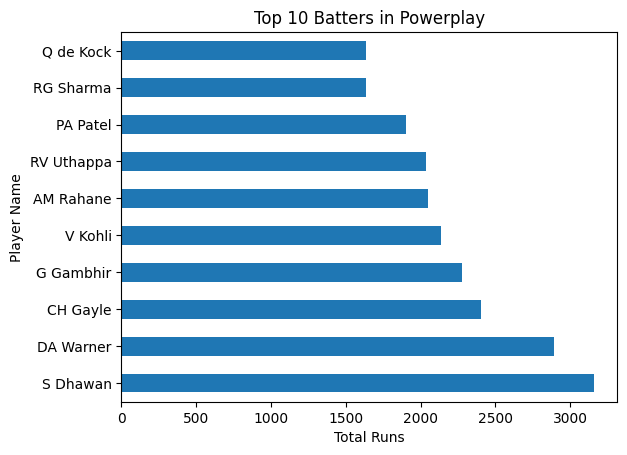

In [143]:
pp_stats.groupby('batsman')['runs'].sum().sort_values(ascending=False).head(10).plot(kind='barh')
plt.xlabel('Total Runs')
plt.ylabel('Player Name')
plt.title('Top 10 Batters in Powerplay')
plt.plot()

#####Top 10 Batters with Most Fours in Powerplay

In [13]:
pp_stats.groupby('batsman')['fours'].sum().sort_values(ascending=False).head(10)

batsman
S Dhawan      415
DA Warner     370
G Gambhir     310
PA Patel      283
AM Rahane     273
V Kohli       271
CH Gayle      267
RV Uthappa    261
V Sehwag      230
SK Raina      198
Name: fours, dtype: int64

#####Top 10 Batters with Most Sixes in Powerplay

In [14]:
pp_stats.groupby('batsman')['sixes'].sum().sort_values(ascending=False).head(10)

batsman
CH Gayle       145
DA Warner       89
S Dhawan        71
BB McCullum     70
Q de Kock       65
RG Sharma       63
KL Rahul        62
SK Raina        55
JC Buttler      55
SR Watson       54
Name: sixes, dtype: int64

#####Top 10 Batters with Most Dot Balls in Powerplay

In [15]:
pp_stats.groupby('batsman')['dots'].sum().sort_values(ascending=False).head(10)

batsman
S Dhawan      1225
DA Warner     1023
CH Gayle      1017
G Gambhir      893
AM Rahane      890
V Kohli        878
PA Patel       818
RV Uthappa     806
RG Sharma      739
M Vijay        717
Name: dots, dtype: int64

#####Top 10 Batters with Most Singles in Powerplay

In [16]:
pp_stats.groupby('batsman')['ones'].sum().sort_values(ascending=False).head(10)

batsman
S Dhawan      840
V Kohli       595
G Gambhir     593
DA Warner     570
AM Rahane     550
RV Uthappa    488
PA Patel      418
KL Rahul      407
CH Gayle      379
RG Sharma     378
Name: ones, dtype: int64

#####Top 10 Batters with Most Doubles in Powerplay

In [17]:
pp_stats.groupby('batsman')['twos'].sum().sort_values(ascending=False).head(10)

batsman
DA Warner     124
G Gambhir     105
S Dhawan       88
M Vijay        87
V Kohli        84
RV Uthappa     77
AM Rahane      76
PA Patel       74
KL Rahul       62
Q de Kock      59
Name: twos, dtype: int64

###Some Stats of Middle Overs

#####Top 10 Batters with Most Runs in Middle Overs

In [18]:
mo_stats.groupby('batsman')['runs'].sum().sort_values(ascending=False).head(10)

batsman
V Kohli           3508
SK Raina          3312
RG Sharma         3102
AB de Villiers    3019
KD Karthik        2698
S Dhawan          2650
AT Rayudu         2602
DA Warner         2590
RV Uthappa        2502
MS Dhoni          2389
Name: runs, dtype: int64

[]

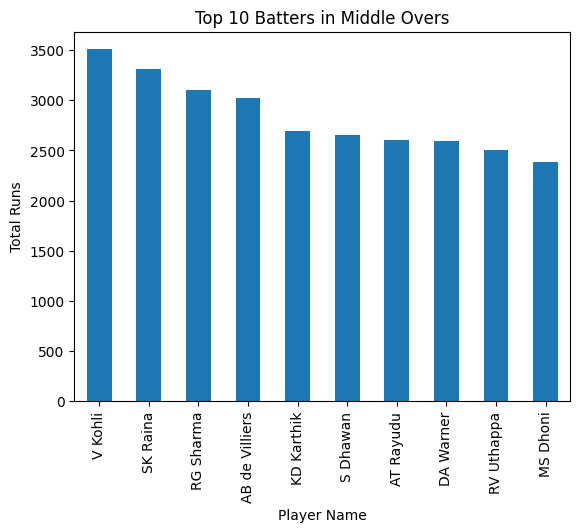

In [19]:
mo_stats.groupby('batsman')['runs'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.xlabel('Player Name')
plt.ylabel('Total Runs')
plt.title('Top 10 Batters in Middle Overs')
plt.plot()

#####Top 10 Batters with Most Fours in Middle Overs

In [20]:
mo_stats.groupby('batsman')['fours'].sum().sort_values(ascending=False).head(10)

batsman
SK Raina          254
KD Karthik        250
S Dhawan          243
RG Sharma         241
V Kohli           240
AB de Villiers    208
AT Rayudu         192
RV Uthappa        191
SR Watson         182
DA Warner         169
Name: fours, dtype: int64

#####Top 10 Batters with Most Sixes in Middle Overs

In [21]:
mo_stats.groupby('batsman')['sixes'].sum().sort_values(ascending=False).head(10)

batsman
CH Gayle          179
AB de Villiers    121
SK Raina          119
SR Watson         119
V Kohli           112
DA Warner         107
YK Pathan         107
RV Uthappa        105
RG Sharma         100
Yuvraj Singh       99
Name: sixes, dtype: int64

#####Top 10 Batters with Most Dot Balls in Middle Overs

In [22]:
mo_stats.groupby('batsman')['dots'].sum().sort_values(ascending=False).head(10)

batsman
MS Dhoni          904
V Kohli           883
RG Sharma         870
SK Raina          779
KD Karthik        776
Yuvraj Singh      721
RV Uthappa        709
AT Rayudu         702
S Dhawan          664
AB de Villiers    639
Name: dots, dtype: int64

#####Top 10 Batters with Most Sinles in Middle Overs

In [23]:
mo_stats.groupby('batsman')['ones'].sum().sort_values(ascending=False).head(10)

batsman
V Kohli           1408
RG Sharma         1242
SK Raina          1242
AB de Villiers    1058
S Dhawan          1031
AT Rayudu         1020
MS Dhoni          1014
KD Karthik         993
DA Warner          873
MK Pandey          868
Name: ones, dtype: int64

#####Top 10 Batters with Most Doubles in Middle Overs

In [24]:
mo_stats.groupby('batsman')['twos'].sum().sort_values(ascending=False).head(10)

batsman
V Kohli           225
DA Warner         195
AB de Villiers    185
KD Karthik        166
SK Raina          164
MS Dhoni          158
S Dhawan          157
RG Sharma         142
AM Rahane         129
G Gambhir         128
Name: twos, dtype: int64

###Some stats of Death Overs

#####Top 10 Batters with Most Runs in Death Overs

In [25]:
do_stats.groupby('batsman')['runs'].sum().sort_values(ascending=False).head(10)

batsman
MS Dhoni          2530
KA Pollard        1708
AB de Villiers    1421
KD Karthik        1282
RA Jadeja         1155
RG Sharma         1145
HH Pandya          998
V Kohli            991
YK Pathan          858
AD Russell         854
Name: runs, dtype: int64

[]

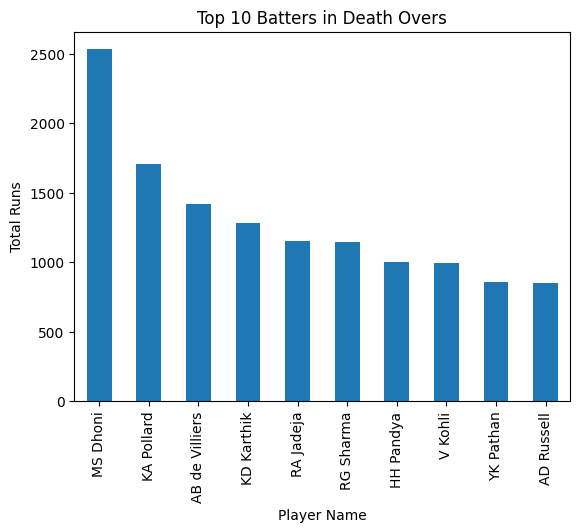

In [26]:
do_stats.groupby('batsman')['runs'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.xlabel('Player Name')
plt.ylabel('Total Runs')
plt.title('Top 10 Batters in Death Overs')
plt.plot()

#####Top 10 Batters with Most Fours in Death Overs

In [27]:
do_stats.groupby('batsman')['fours'].sum().sort_values(ascending=False).head(10)

batsman
MS Dhoni          195
KD Karthik        121
KA Pollard        110
AB de Villiers    106
RG Sharma          90
RA Jadeja          86
YK Pathan          76
HH Pandya          71
V Kohli            70
AT Rayudu          64
Name: fours, dtype: int64

#####Top 10 Batters with Most Sixes in Death Overs

In [28]:
do_stats.groupby('batsman')['sixes'].sum().sort_values(ascending=False).head(10)

batsman
MS Dhoni          152
KA Pollard        127
AB de Villiers    112
RG Sharma          78
AD Russell         77
HH Pandya          72
KD Karthik         69
V Kohli            64
RA Jadeja          55
DA Miller          50
Name: sixes, dtype: int64

#####Top 10 Batters with Most Dot Balls in Death Overs

In [29]:
do_stats.groupby('batsman')['dots'].sum().sort_values(ascending=False).head(10)

batsman
MS Dhoni           415
KA Pollard         344
RA Jadeja          219
KD Karthik         215
HH Pandya          191
AD Russell         171
RG Sharma          170
AB de Villiers     157
Harbhajan Singh    153
YK Pathan          147
Name: dots, dtype: int64

###Some Stats Innings Wise

In [30]:
def byInnings(df,current_innings):
  df=df[df.inning == current_innings]
  df.reset_index(inplace=True,drop=True)

  df['isDot'] = df['batsman_runs'].apply(lambda x: 1 if x == 0 else 0)
  df['isOne'] = df['batsman_runs'].apply(lambda x: 1 if x == 1 else 0)
  df['isTwo'] = df['batsman_runs'].apply(lambda x: 1 if x == 2 else 0)
  df['isThree'] = df['batsman_runs'].apply(lambda x: 1 if x == 3 else 0)
  df['isFour'] = df['batsman_runs'].apply(lambda x: 1 if x == 4 else 0)
  df['isSix'] = df['batsman_runs'].apply(lambda x: 1 if x == 6 else 0)
  
  runs = pd.DataFrame(df.groupby(['batsman'])['batsman_runs'].sum().reset_index()).rename(columns={'batsman_runs':'runs'})
  innings = pd.DataFrame(df.groupby(['batsman'])['matchId'].apply(lambda x: len(list(np.unique(x)))).reset_index()).rename(columns = {'matchId':'innings'})
  balls = pd.DataFrame(df.groupby(['batsman'])['matchId'].count()).reset_index().rename(columns = {'matchId':'balls'})
  dismissals = pd.DataFrame(df.groupby(['batsman'])['player_dismissed'].count()).reset_index().rename(columns = {'player_dismissed':'dismissals'})
  
  dots = pd.DataFrame(df.groupby(['batsman'])['isDot'].sum()).reset_index().rename(columns = {'isDot':'dots'})
  ones = pd.DataFrame(df.groupby(['batsman'])['isOne'].sum()).reset_index().rename(columns = {'isOne':'ones'})
  twos = pd.DataFrame(df.groupby(['batsman'])['isTwo'].sum()).reset_index().rename(columns = {'isTwo':'twos'})
  threes = pd.DataFrame(df.groupby(['batsman'])['isThree'].sum()).reset_index().rename(columns = {'isThree':'threes'})
  fours = pd.DataFrame(df.groupby(['batsman'])['isFour'].sum()).reset_index().rename(columns = {'isFour':'fours'})
  sixes = pd.DataFrame(df.groupby(['batsman'])['isSix'].sum()).reset_index().rename(columns = {'isSix':'sixes'})
  
  df = pd.merge(innings, runs, on = 'batsman').merge(balls, on = 'batsman').merge(dismissals, on = 'batsman').merge(dots, on = 'batsman').merge(ones, on = 'batsman').merge(twos, on = 'batsman').merge(threes, on = 'batsman').merge(fours, on = 'batsman').merge(sixes, on = 'batsman')
  
  #StrikeRate
  df['SR'] = df.apply(lambda x: 100*(x['runs']/x['balls']), axis = 1)

  #runs per innings
  df['RPI'] = df.apply(lambda x: x['runs']/x['innings'], axis = 1)

  #balls per dismissals
  df['BPD'] = df.apply(lambda x: balls_per_dismissal(x['balls'], x['dismissals']), axis = 1)

  #balls per boundary
  df['BPB'] = df.apply(lambda x: balls_per_boundary(x['balls'], (x['fours'] + x['sixes'])), axis = 1)

  df['Dot%'] = df.apply(lambda x: 100*(x['dots']/x['balls']), axis = 1)
  
  return df

In [31]:
firstinn=byInnings(deliveries,1)
secondinn=byInnings(deliveries,2)

In [32]:
firstinn.head(5)

,batsman,innings,runs,balls,dismissals,dots,ones,twos,threes,fours,sixes,SR,RPI,BPD,BPB,Dot%
0,A Ashish Reddy,13,166,115,7,32,53,13,1,6,10,144.347826,12.769231,16.428571,7.187500,27.826087
1,A Badoni,5,106,89,5,32,38,8,0,7,4,119.101124,21.200000,17.800000,8.090909,35.955056
2,A Chandila,2,4,7,1,3,4,0,0,0,0,57.142857,2.000000,7.000000,7.000000,42.857143
3,A Chopra,5,51,72,4,44,19,2,0,7,0,70.833333,10.200000,18.000000,10.285714,61.111111
4,A Choudhary,1,15,12,0,1,9,1,0,1,0,125.000000,15.000000,12.000000,12.000000,8.333333


In [33]:
secondinn.head(5)

,batsman,innings,runs,balls,dismissals,dots,ones,twos,threes,fours,sixes,SR,RPI,BPD,BPB,Dot%
0,A Ashish Reddy,10,114,81,8,29,30,7,0,10,5,140.740741,11.400000,10.125,5.400000,35.802469
1,A Badoni,6,55,50,4,25,15,3,0,4,3,110.000000,9.166667,12.500,7.142857,50.000000
2,A Chopra,1,2,3,1,1,2,0,0,0,0,66.666667,2.000000,3.000,3.000000,33.333333
3,A Choudhary,2,10,8,2,3,4,0,0,0,1,125.000000,5.000000,4.000,8.000000,37.500000
4,A Flintoff,2,40,43,2,21,15,2,1,3,1,93.023256,20.000000,21.500,10.750000,48.837209


###Some Stats of 1st Innings


#####Top 10 Batters with Most Runs in 1st Innings

In [34]:
firstinn.groupby('batsman')['runs'].sum().sort_values(ascending=False).head(10)

batsman
V Kohli           3554
S Dhawan          3537
RG Sharma         3415
SK Raina          3194
AB de Villiers    3163
DA Warner         3042
MS Dhoni          2923
CH Gayle          2873
KD Karthik        2497
RV Uthappa        2120
Name: runs, dtype: int64

[]

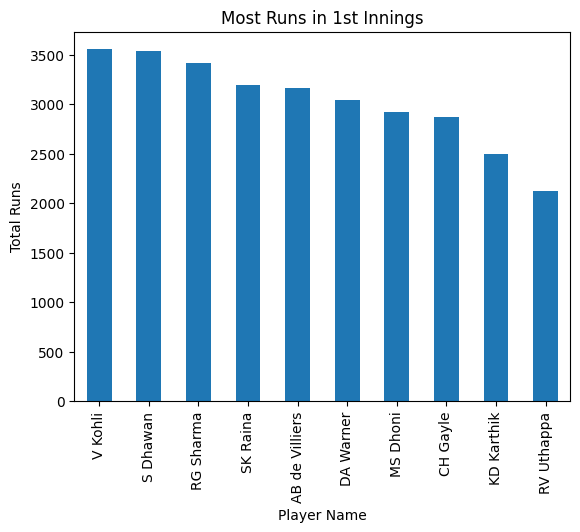

In [35]:
firstinn.groupby('batsman')['runs'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.xlabel('Player Name')
plt.ylabel('Total Runs')
plt.title('Most Runs in 1st Innings')
plt.plot()

#####Top 10 Batters with Most Fours in 1st Innings

In [36]:
firstinn.groupby('batsman')['fours'].sum().sort_values(ascending=False).head(10)

batsman
S Dhawan          389
RG Sharma         307
V Kohli           291
DA Warner         285
SK Raina          277
AB de Villiers    254
CH Gayle          240
KD Karthik        230
AM Rahane         224
MS Dhoni          211
Name: fours, dtype: int64

#####Top 10 Batters with Most Sixes in 1st Innings

In [37]:
firstinn.groupby('batsman')['sixes'].sum().sort_values(ascending=False).head(10)

batsman
CH Gayle          201
AB de Villiers    159
RG Sharma         145
MS Dhoni          132
V Kohli           122
KA Pollard        119
SK Raina          118
DA Warner         114
AD Russell         94
KD Karthik         90
Name: sixes, dtype: int64

#####Top 10 Batters with Most Dot Balls in 1st Innings

In [38]:
firstinn.groupby('batsman')['dots'].sum().sort_values(ascending=False).head(10)

batsman
S Dhawan      1096
V Kohli       1002
RG Sharma      956
CH Gayle       870
DA Warner      840
SK Raina       837
MS Dhoni       769
RV Uthappa     710
KD Karthik     693
AM Rahane      660
Name: dots, dtype: int64

#####Top 10 Batters with Most Singles in 1st Innings

In [39]:
firstinn.groupby('batsman')['ones'].sum().sort_values(ascending=False).head(10)

batsman
V Kohli           1215
S Dhawan          1153
RG Sharma         1017
SK Raina          1008
MS Dhoni           856
DA Warner          833
AB de Villiers     825
KD Karthik         737
AT Rayudu          692
AM Rahane          684
Name: ones, dtype: int64

#####Top 10 Batters with Most Doubles in 1st Innings

In [40]:
firstinn.groupby('batsman')['twos'].sum().sort_values(ascending=False).head(10)

batsman
V Kohli           211
MS Dhoni          202
SK Raina          176
DA Warner         169
AB de Villiers    169
S Dhawan          149
RG Sharma         144
KD Karthik        135
AM Rahane         114
MK Pandey         108
Name: twos, dtype: int64

###Some Stats of 2nd Innings

#####Top 10 Batters with Most Runs in 2nd Innings

In [41]:
secondinn.groupby('batsman')['runs'].sum().sort_values(ascending=False).head(10)

batsman
V Kohli       3070
DA Warner     2839
RV Uthappa    2832
S Dhawan      2707
RG Sharma     2464
G Gambhir     2460
SK Raina      2334
SR Watson     2162
AT Rayudu     2140
CH Gayle      2092
Name: runs, dtype: int64

[]

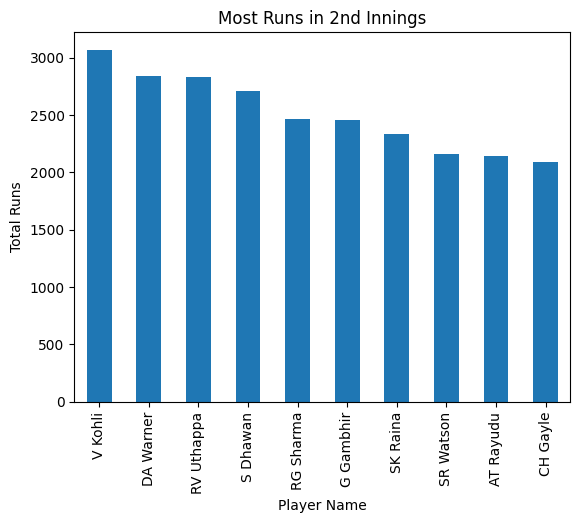

In [42]:
secondinn.groupby('batsman')['runs'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.xlabel('Player Name')
plt.ylabel('Total Runs')
plt.title('Most Runs in 2nd Innings')
plt.plot()

#####Top 10 Batters with Most Fours in 2nd Innings

In [43]:
secondinn.groupby('batsman')['fours'].sum().sort_values(ascending=False).head(10)

batsman
S Dhawan      312
G Gambhir     296
DA Warner     292
V Kohli       288
RV Uthappa    280
SK Raina      229
RG Sharma     212
SR Watson     210
AM Rahane     207
PA Patel      197
Name: fours, dtype: int64

#####Top 10 Batters with Most Sixes in 2nd Innings

In [44]:
secondinn.groupby('batsman')['sixes'].sum().sort_values(ascending=False).head(10)

batsman
CH Gayle          156
SR Watson         110
RV Uthappa        110
YK Pathan         109
KA Pollard        104
DA Warner         102
V Kohli            97
MS Dhoni           97
RG Sharma          96
AB de Villiers     92
Name: sixes, dtype: int64

#####Top 10 Batters with Most Dot Balls in 2nd Innings

In [45]:
secondinn.groupby('batsman')['dots'].sum().sort_values(ascending=False).head(10)

batsman
RV Uthappa    888
V Kohli       884
S Dhawan      862
G Gambhir     831
RG Sharma     822
DA Warner     793
CH Gayle      764
AM Rahane     681
AT Rayudu     677
SR Watson     670
Name: dots, dtype: int64

#####Top 10 Batters with Most Singles in 2nd Innings

In [46]:
secondinn.groupby('batsman')['ones'].sum().sort_values(ascending=False).head(10)

batsman
V Kohli       966
S Dhawan      828
RG Sharma     818
G Gambhir     809
AT Rayudu     751
RV Uthappa    750
SK Raina      700
AM Rahane     687
DA Warner     680
MK Pandey     680
Name: ones, dtype: int64

#####Top 10 Batters with Most Doubles in 2nd Innings

In [47]:
secondinn.groupby('batsman')['twos'].sum().sort_values(ascending=False).head(10)

batsman
DA Warner     176
V Kohli       167
G Gambhir     148
RV Uthappa    135
MS Dhoni      131
S Dhawan      130
AM Rahane     113
SV Samson     109
KL Rahul      109
KD Karthik    105
Name: twos, dtype: int64

In [48]:
comp=firstinn[['batsman','RPI']].merge(secondinn[['batsman','RPI']],on='batsman',how='inner').rename(columns={'RPI_x':'1st_RPI','RPI_y':'2nd_RPI'})
comp.head(5)

,batsman,1st_RPI,2nd_RPI
0,A Ashish Reddy,12.769231,11.400000
1,A Badoni,21.200000,9.166667
2,A Chopra,10.200000,2.000000
3,A Choudhary,15.000000,5.000000
4,A Flintoff,22.000000,20.000000


[]

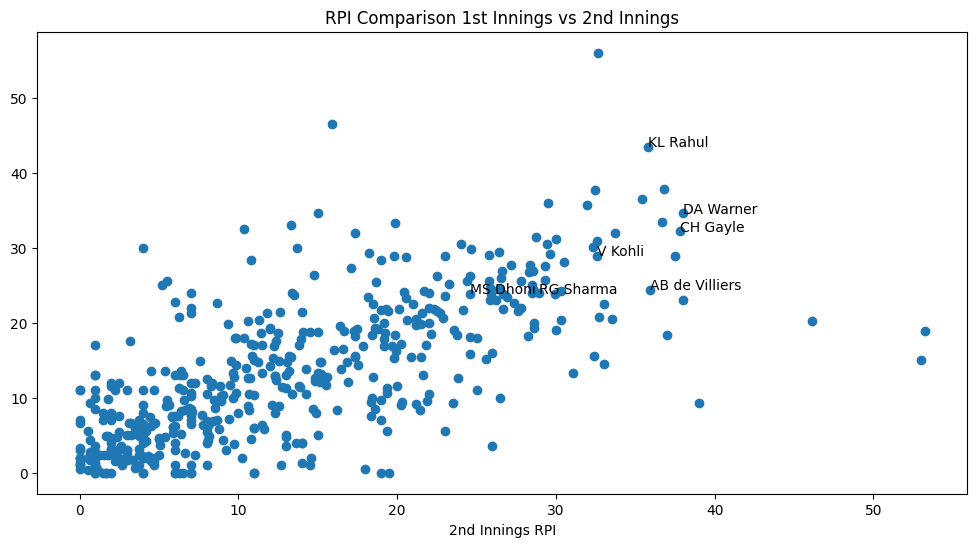

In [49]:
plt.figure(figsize=(12,6))
plt.scatter(comp['1st_RPI'],comp['2nd_RPI'])
plt.xlabel('1st Innings RPI')
plt.xlabel('2nd Innings RPI')
plt.title('RPI Comparison 1st Innings vs 2nd Innings')

annotations=list(comp['batsman'])
players=['CH Gayle','V Kohli','RG Sharma','KL Rahul','DA Warner','AB de Villiers','MS Dhoni']

for i,label in enumerate(annotations):
  if label in players:
    plt.annotate(label,(comp['1st_RPI'][i],comp['2nd_RPI'][i]))
plt.plot()

In [50]:
comp1=firstinn[['batsman','BPD']].merge(secondinn[['batsman','BPD']],on='batsman',how='inner')
comp1.head(5)

,batsman,BPD_x,BPD_y
0,A Ashish Reddy,16.428571,10.125
1,A Badoni,17.800000,12.500
2,A Chopra,18.000000,3.000
3,A Choudhary,12.000000,4.000
4,A Flintoff,14.000000,21.500


[]

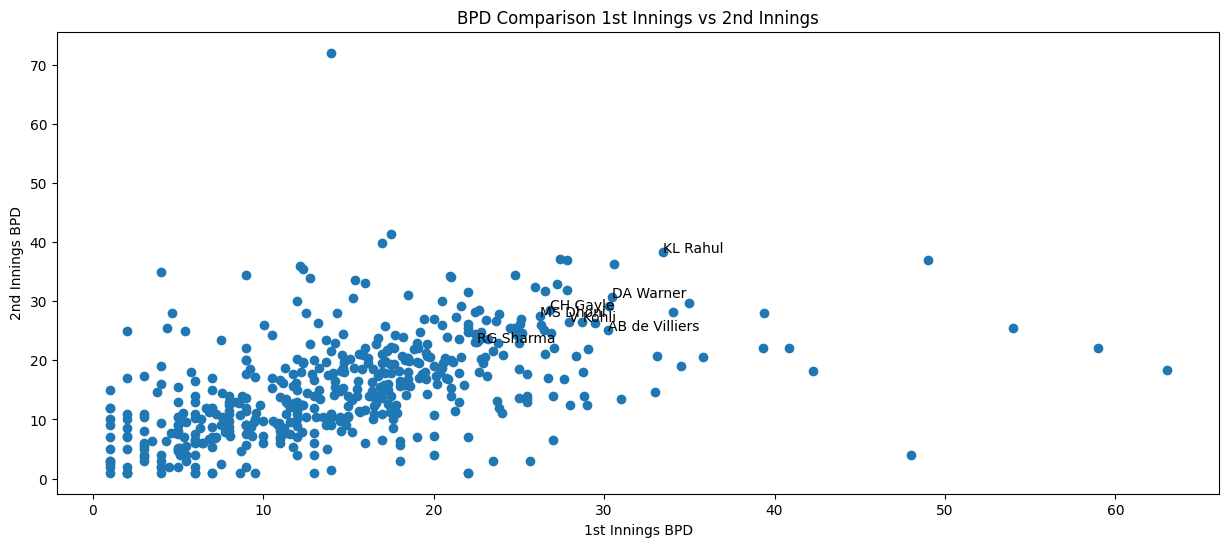

In [51]:
plt.figure(figsize=(15,6))
plt.scatter(comp1['BPD_x'],comp1['BPD_y'])
plt.xlabel('1st Innings BPD')
plt.ylabel('2nd Innings BPD')
plt.title('BPD Comparison 1st Innings vs 2nd Innings')

annotations=list(comp1['batsman'])
players=['CH Gayle','V Kohli','RG Sharma','KL Rahul','DA Warner','AB de Villiers','MS Dhoni']

for i,label in enumerate(annotations):
  if label in players:
    plt.annotate(label,(comp1['BPD_x'][i],comp1['BPD_y'][i]))

plt.plot()

###Some Stats Team Wise

In [52]:
def statsbyteam(df,team):

  df=df[df.bowling_team==team]
  df.reset_index(inplace=True,drop=True)

  df['isDot'] = df['batsman_runs'].apply(lambda x: 1 if x == 0 else 0)
  df['isOne'] = df['batsman_runs'].apply(lambda x: 1 if x == 1 else 0)
  df['isTwo'] = df['batsman_runs'].apply(lambda x: 1 if x == 2 else 0)
  df['isThree'] = df['batsman_runs'].apply(lambda x: 1 if x == 3 else 0)
  df['isFour'] = df['batsman_runs'].apply(lambda x: 1 if x == 4 else 0)
  df['isSix'] = df['batsman_runs'].apply(lambda x: 1 if x == 6 else 0)
  
  runs = pd.DataFrame(df.groupby(['batsman'])['batsman_runs'].sum().reset_index()).rename(columns={'batsman_runs':'runs'})
  innings = pd.DataFrame(df.groupby(['batsman'])['matchId'].apply(lambda x: len(list(np.unique(x)))).reset_index()).rename(columns = {'matchId':'innings'})
  balls = pd.DataFrame(df.groupby(['batsman'])['matchId'].count()).reset_index().rename(columns = {'matchId':'balls'})
  dismissals = pd.DataFrame(df.groupby(['batsman'])['player_dismissed'].count()).reset_index().rename(columns = {'player_dismissed':'dismissals'})
  
  dots = pd.DataFrame(df.groupby(['batsman'])['isDot'].sum()).reset_index().rename(columns = {'isDot':'dots'})
  ones = pd.DataFrame(df.groupby(['batsman'])['isOne'].sum()).reset_index().rename(columns = {'isOne':'ones'})
  twos = pd.DataFrame(df.groupby(['batsman'])['isTwo'].sum()).reset_index().rename(columns = {'isTwo':'twos'})
  threes = pd.DataFrame(df.groupby(['batsman'])['isThree'].sum()).reset_index().rename(columns = {'isThree':'threes'})
  fours = pd.DataFrame(df.groupby(['batsman'])['isFour'].sum()).reset_index().rename(columns = {'isFour':'fours'})
  sixes = pd.DataFrame(df.groupby(['batsman'])['isSix'].sum()).reset_index().rename(columns = {'isSix':'sixes'})
  
  df = pd.merge(innings, runs, on = 'batsman').merge(balls, on = 'batsman').merge(dismissals, on = 'batsman').merge(dots, on = 'batsman').merge(ones, on = 'batsman').merge(twos, on = 'batsman').merge(threes, on = 'batsman').merge(fours, on = 'batsman').merge(sixes, on = 'batsman')
  
  #StrikeRate
  df['SR'] = df.apply(lambda x: 100*(x['runs']/x['balls']), axis = 1)

  #runs per innings
  df['RPI'] = df.apply(lambda x: x['runs']/x['innings'], axis = 1)

  #balls per dismissals
  df['BPD'] = df.apply(lambda x: balls_per_dismissal(x['balls'], x['dismissals']), axis = 1)

  #balls per boundary
  df['BPB'] = df.apply(lambda x: balls_per_boundary(x['balls'], (x['fours'] + x['sixes'])), axis = 1)

  df['Dot%'] = df.apply(lambda x: 100*(x['dots']/x['balls']), axis = 1)
  
  return df

###Stats vs MI


In [53]:
againstmi=statsbyteam(deliveries,'Mumbai Indians')

In [54]:
againstmi.head(5)

,batsman,innings,runs,balls,dismissals,dots,ones,twos,threes,fours,sixes,SR,RPI,BPD,BPB,Dot%
0,A Ashish Reddy,2,27,25,2,12,7,4,0,0,2,108.000000,13.5,12.5,12.500000,48.000000
1,A Badoni,1,14,11,1,3,6,1,0,0,1,127.272727,14.0,11.0,11.000000,27.272727
2,A Chopra,1,1,4,0,3,1,0,0,0,0,25.000000,1.0,4.0,4.000000,75.000000
3,A Flintoff,1,24,25,1,14,7,0,1,2,1,96.000000,24.0,25.0,8.333333,56.000000
4,A Kumble,3,9,12,0,6,5,0,0,1,0,75.000000,3.0,12.0,12.000000,50.000000


#####TOP 10 Batters with Most Runs Vs Mumbai Indians

In [55]:
againstmi.groupby('batsman')['runs'].sum().sort_values(ascending=False).head(10)

batsman
KL Rahul          871
S Dhawan          871
SK Raina          824
AB de Villiers    791
V Kohli           774
MS Dhoni          746
CH Gayle          715
MK Pandey         710
DA Warner         666
AM Rahane         625
Name: runs, dtype: int64

[]

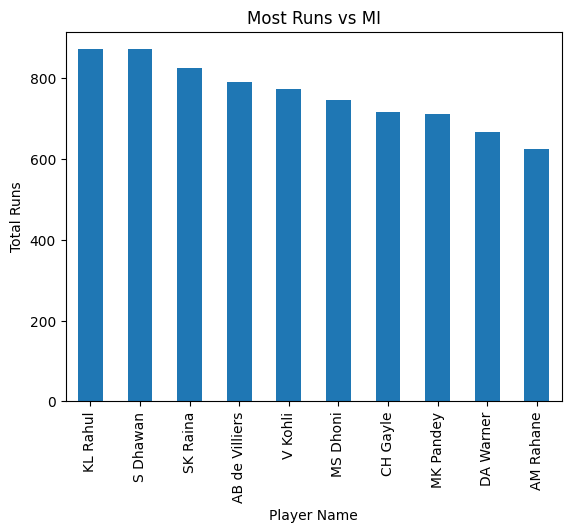

In [56]:
againstmi.groupby('batsman')['runs'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.xlabel('Player Name')
plt.ylabel('Total Runs')
plt.title('Most Runs vs MI')
plt.plot()

#####TOP 10 Batters with Most Dot Balls Vs Mumbai Indians

In [57]:
againstmi.groupby('batsman')['dots'].sum().sort_values(ascending=False).head(10)

batsman
CH Gayle      281
S Dhawan      273
MS Dhoni      242
V Kohli       235
RV Uthappa    226
KL Rahul      225
SK Raina      223
AM Rahane     214
SR Watson     210
M Vijay       197
Name: dots, dtype: int64

#####TOP 10 Batters with Most Fours Vs Mumbai Indians

In [58]:
againstmi.groupby('batsman')['fours'].sum().sort_values(ascending=False).head(10)

batsman
S Dhawan          95
AB de Villiers    72
AM Rahane         70
KL Rahul          68
SK Raina          68
V Kohli           65
DA Warner         64
CH Gayle          62
MK Pandey         57
MS Dhoni          57
Name: fours, dtype: int64

#####TOP 10 Batters with Most Sixes Vs Mumbai Indians

In [59]:
againstmi.groupby('batsman')['sixes'].sum().sort_values(ascending=False).head(10)

batsman
CH Gayle          45
AB de Villiers    36
SK Raina          35
MS Dhoni          34
KL Rahul          34
JC Buttler        29
V Kohli           27
RV Uthappa        26
MK Pandey         25
DA Warner         25
Name: sixes, dtype: int64

#####TOP 10 Batters dismissed most by Mumbai Indians

In [136]:
againstmi.groupby('batsman')['dismissals'].sum().sort_values(ascending=False).head(10)

batsman
SK Raina      29
RV Uthappa    26
V Kohli       26
MS Dhoni      23
SR Watson     23
S Dhawan      23
G Gambhir     22
AM Rahane     21
M Vijay       20
MK Pandey     19
Name: dismissals, dtype: int64

####TOP 10 Batters with highest RPI vs Mumbai Indians

In [139]:
againstmi=againstmi[againstmi.balls > 50]
againstmi.groupby('batsman')['RPI'].sum().sort_values(ascending=False).head(10)

batsman
JC Buttler          66.714286
KL Rahul            54.437500
HM Amla             52.000000
VR Iyer             48.666667
JJ Roy              46.333333
OA Shah             45.000000
RN ten Doeschate    44.000000
SE Marsh            43.833333
ML Hayden           42.833333
KC Sangakkara       37.375000
Name: RPI, dtype: float64

###Stats vs CSK


In [60]:
againstcsk=statsbyteam(deliveries,'Chennai Super Kings')

In [61]:
againstcsk.head(5)

,batsman,innings,runs,balls,dismissals,dots,ones,twos,threes,fours,sixes,SR,RPI,BPD,BPB,Dot%
0,A Ashish Reddy,3,45,25,2,8,8,2,1,3,3,180.000000,15.00,12.5,4.166667,32.000000
1,A Badoni,1,19,14,0,7,3,2,0,0,2,135.714286,19.00,14.0,7.000000,50.000000
2,A Kumble,2,3,6,0,4,1,1,0,0,0,50.000000,1.50,6.0,6.000000,66.666667
3,A Manohar,1,12,12,1,6,4,0,0,2,0,100.000000,12.00,12.0,6.000000,50.000000
4,A Mishra,8,58,64,5,35,16,6,0,6,1,90.625000,7.25,12.8,9.142857,54.687500


#####TOP 10 Batters with Most Runs Vs Chennai Super Kings

In [62]:
againstcsk.groupby('batsman')['runs'].sum().sort_values(ascending=False).head(10)

batsman
S Dhawan          1029
V Kohli            979
RG Sharma          770
KD Karthik         647
KA Pollard         583
DA Warner          558
RV Uthappa         547
AB de Villiers     532
SR Watson          480
KL Rahul           435
Name: runs, dtype: int64

[]

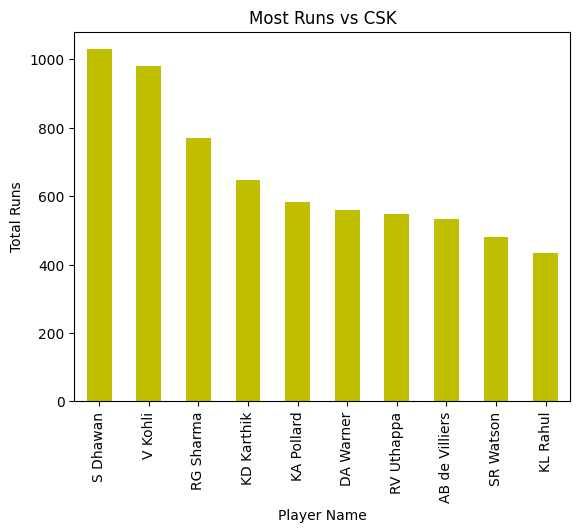

In [63]:
againstcsk.groupby('batsman')['runs'].sum().sort_values(ascending=False).head(10).plot(kind='bar',color='y')
plt.xlabel('Player Name')
plt.ylabel('Total Runs')
plt.title('Most Runs vs CSK')
plt.plot()

#####TOP 10 Batters with Most Dot Balls Vs Chennai Super Kings

In [64]:
againstcsk.groupby('batsman')['dots'].sum().sort_values(ascending=False).head(10)

batsman
V Kohli       301
S Dhawan      296
RG Sharma     236
KD Karthik    191
RV Uthappa    176
DA Warner     168
CH Gayle      168
G Gambhir     140
MK Pandey     136
KA Pollard    135
Name: dots, dtype: int64

#####TOP 10 Batters with Most Fours Vs Chennai Super Kings

In [65]:
againstcsk.groupby('batsman')['fours'].sum().sort_values(ascending=False).head(10)

batsman
S Dhawan          114
V Kohli            72
KD Karthik         71
RG Sharma          69
DA Warner          55
RV Uthappa         54
G Gambhir          49
V Sehwag           48
SR Tendulkar       45
AB de Villiers     42
Name: fours, dtype: int64

#####TOP 10 Batters with Most Sixes Vs Chennai Super Kings

In [66]:
againstcsk.groupby('batsman')['sixes'].sum().sort_values(ascending=False).head(10)

batsman
KA Pollard        44
V Kohli           37
CH Gayle          30
SR Watson         27
RG Sharma         26
AD Russell        26
AB de Villiers    25
S Dhawan          21
KL Rahul          20
RV Uthappa        20
Name: sixes, dtype: int64

#####TOP 10 Batters dismissed most by Chennai Super Kings

In [135]:
againstcsk.groupby('batsman')['dismissals'].sum().sort_values(ascending=False).head(10)

batsman
RG Sharma         30
V Kohli           28
KD Karthik        24
AB de Villiers    23
S Dhawan          22
RV Uthappa        19
DA Warner         18
MK Pandey         17
KA Pollard        17
MA Agarwal        16
Name: dismissals, dtype: int64

####TOP 10 Batters with highest RPI vs Chennai Super Kings

In [140]:
againstcsk=againstcsk[againstcsk.balls > 50]
againstcsk.groupby('batsman')['RPI'].sum().sort_values(ascending=False).head(10)

batsman
PC Valthaty      120.000000
Salman Butt       73.000000
ST Jayasuriya     47.500000
LMP Simmons       46.833333
MS Bisla          46.400000
Tilak Varma       42.500000
SE Marsh          42.285714
JA Morkel         40.500000
SR Watson         40.000000
KL Rahul          39.545455
Name: RPI, dtype: float64

###Stats vs RCB

In [67]:
againstrcb=statsbyteam(deliveries,'Royal Challengers Bangalore')

In [68]:
againstrcb.head(5)

,batsman,innings,runs,balls,dismissals,dots,ones,twos,threes,fours,sixes,SR,RPI,BPD,BPB,Dot%
0,A Ashish Reddy,5,55,42,4,15,19,2,0,2,4,130.952381,11.0,10.5,7.000000,35.714286
1,A Badoni,1,13,13,1,7,3,1,0,2,0,100.000000,13.0,13.0,6.500000,53.846154
2,A Chandila,1,4,6,0,2,4,0,0,0,0,66.666667,4.0,6.0,6.000000,33.333333
3,A Chopra,1,2,5,1,3,2,0,0,0,0,40.000000,2.0,5.0,5.000000,60.000000
4,A Flintoff,1,22,14,0,3,8,0,0,2,1,157.142857,22.0,14.0,4.666667,21.428571


#####TOP 10 Batters with Most Runs Vs Royal Challengers Bangalore

In [69]:
againstrcb.groupby('batsman')['runs'].sum().sort_values(ascending=False).head(10)

batsman
MS Dhoni      838
DA Warner     820
RG Sharma     785
AT Rayudu     714
SK Raina      702
RV Uthappa    687
S Dhawan      679
AM Rahane     648
G Gambhir     647
KL Rahul      610
Name: runs, dtype: int64

[]

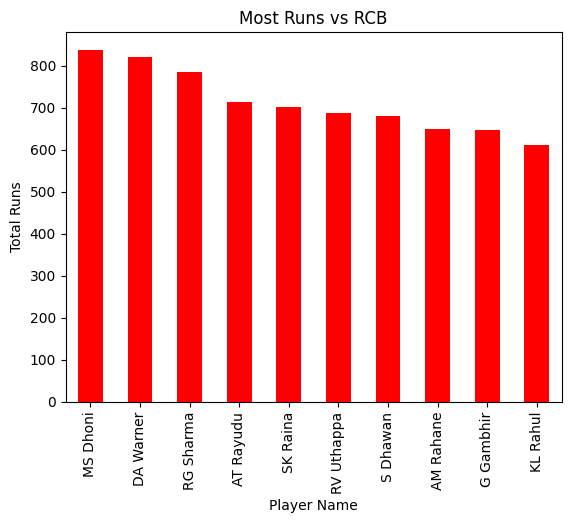

In [132]:
againstrcb.groupby('batsman')['runs'].sum().sort_values(ascending=False).head(10).plot(kind='bar',color='r')
plt.xlabel('Player Name')
plt.ylabel('Total Runs')
plt.title('Most Runs vs RCB')
plt.plot()

#####TOP 10 Batters with Most Dot Balls Vs Royal Challengers Bangalore

In [71]:
againstrcb.groupby('batsman')['dots'].sum().sort_values(ascending=False).head(10)

batsman
SK Raina       229
RG Sharma      226
AT Rayudu      225
MS Dhoni       217
S Dhawan       209
RV Uthappa     203
DA Warner      190
AM Rahane      188
G Gambhir      181
BB McCullum    163
Name: dots, dtype: int64

#####TOP 10 Batters with Most Fours Vs Royal Challengers Bangalore

In [72]:
againstrcb.groupby('batsman')['fours'].sum().sort_values(ascending=False).head(10)

batsman
G Gambhir      78
DA Warner      74
S Dhawan       73
AM Rahane      73
RG Sharma      72
RV Uthappa     70
SK Raina       63
BB McCullum    55
AT Rayudu      55
MS Dhoni       51
Name: fours, dtype: int64

#####TOP 10 Batters with Most Sixes Vs Royal Challengers Bangalore

In [73]:
againstrcb.groupby('batsman')['sixes'].sum().sort_values(ascending=False).head(10)

batsman
MS Dhoni       46
DA Warner      43
AD Russell     38
KL Rahul       35
RG Sharma      34
KA Pollard     32
SK Raina       31
BB McCullum    30
AT Rayudu      29
RV Uthappa     27
Name: sixes, dtype: int64

#####TOP 10 Batters dismissed most by Royal Challengers Bangalore

In [134]:
againstrcb.groupby('batsman')['dismissals'].sum().sort_values(ascending=False).head(10)

batsman
RG Sharma     28
MS Dhoni      24
SK Raina      23
DA Warner     21
AT Rayudu     21
S Dhawan      21
KD Karthik    21
G Gambhir     20
RV Uthappa    19
AM Rahane     18
Name: dismissals, dtype: int64

####TOP 10 Batters with highest RPI vs Royal Challengers Bangalore

In [141]:
againstrcb=againstrcb[againstrcb.balls > 50]
againstrcb.groupby('batsman')['RPI'].sum().sort_values(ascending=False).head(10)

batsman
S Dube           70.500000
RS Bopara        67.666667
LMP Simmons      63.500000
JM Bairstow      63.250000
KL Rahul         50.833333
CH Gayle         44.714286
JD Ryder         42.500000
E Lewis          41.666667
DA Warner        41.000000
KS Williamson    40.777778
Name: RPI, dtype: float64

###Stats of Some Big Players vs Teams

[]

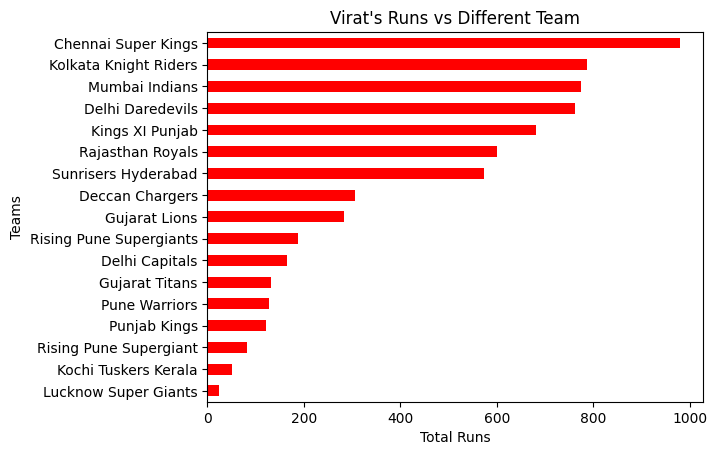

In [74]:
deliveries[deliveries.batsman=='V Kohli'].groupby('bowling_team')['batsman_runs'].sum().sort_values().plot(kind='barh',color='r')
plt.xlabel('Total Runs')
plt.ylabel('Teams')
plt.title("Virat's Runs vs Different Team")
plt.plot()

[]

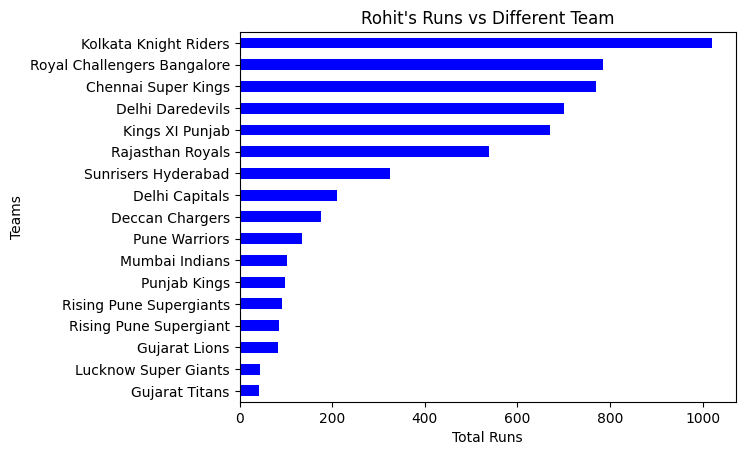

In [75]:
deliveries[deliveries.batsman=='RG Sharma'].groupby('bowling_team')['batsman_runs'].sum().sort_values().plot(kind='barh',color='b')
plt.xlabel('Total Runs')
plt.ylabel('Teams')
plt.title("Rohit's Runs vs Different Team")
plt.plot()

[]

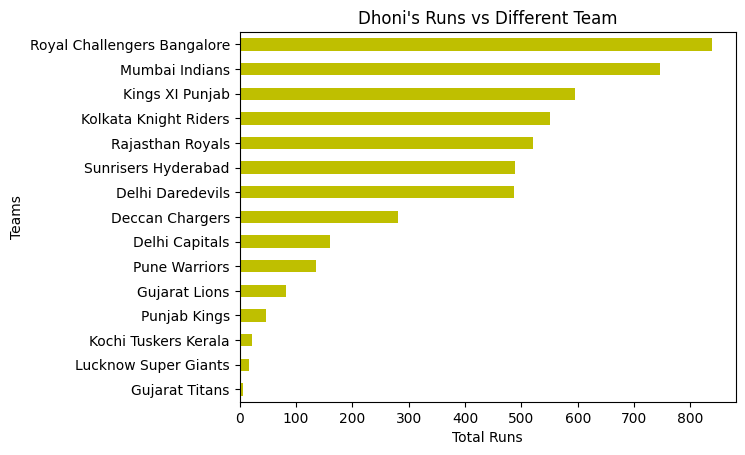

In [76]:
deliveries[deliveries.batsman=='MS Dhoni'].groupby('bowling_team')['batsman_runs'].sum().sort_values().plot(kind='barh',color='y')
plt.xlabel('Total Runs')
plt.ylabel('Teams')
plt.title("Dhoni's Runs vs Different Team")
plt.plot()

[]

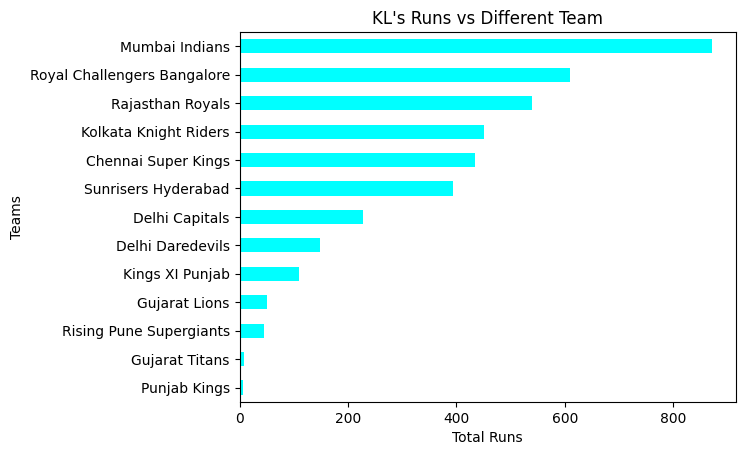

In [77]:
deliveries[deliveries.batsman=='KL Rahul'].groupby('bowling_team')['batsman_runs'].sum().sort_values().plot(kind='barh',color='cyan')
plt.xlabel('Total Runs')
plt.ylabel('Teams')
plt.title("KL's Runs vs Different Team")
plt.plot()

In [78]:
matches=pd.read_csv('/content/drive/MyDrive/DATASETS/matches_updated_mens_ipl.csv')

In [79]:
matches.head(10)

,outcome,event,date,gender,reserve_umpire,team1,toss_winner,umpire2,match_referee,season,...,toss_decision,city,tv_umpire,date2,winner,umpire1,match_number,eliminator,winner_wickets,matchId
0,NaN,Indian Premier League,2017-04-05,male,N Pandit,Sunrisers Hyderabad,Royal Challengers Bangalore,NJ Llong,J Srinath,2017,...,field,Hyderabad,A Deshmukh,NaN,Sunrisers Hyderabad,AY Dandekar,1.0,NaN,NaN,1082591
1,NaN,Indian Premier League,2017-04-06,male,Navdeep Singh,Rising Pune Supergiant,Rising Pune Supergiant,S Ravi,M Nayyar,2017,...,field,Pune,VK Sharma,NaN,Rising Pune Supergiant,A Nand Kishore,2.0,NaN,7.0,1082592
2,NaN,Indian Premier League,2017-04-07,male,K Srinivasan,Gujarat Lions,Kolkata Knight Riders,CK Nandan,V Narayan Kutty,2017,...,field,Rajkot,YC Barde,NaN,Kolkata Knight Riders,Nitin Menon,3.0,NaN,10.0,1082593
3,NaN,Indian Premier League,2017-04-08,male,R Pandit,Kings XI Punjab,Kings XI Punjab,C Shamshuddin,Chinmay Sharma,2017,...,field,Indore,KN Ananthapadmanabhan,NaN,Kings XI Punjab,AK Chaudhary,4.0,NaN,6.0,1082594
4,NaN,Indian Premier League,2017-04-08,male,Navdeep Singh,Royal Challengers Bangalore,Royal Challengers Bangalore,VK Sharma,J Srinath,2017,...,bat,Bengaluru,A Nand Kishore,NaN,Royal Challengers Bangalore,S Ravi,5.0,NaN,NaN,1082595
5,NaN,Indian Premier League,2017-04-09,male,N Pandit,Sunrisers Hyderabad,Sunrisers Hyderabad,NJ Llong,M Nayyar,2017,...,field,Hyderabad,AY Dandekar,NaN,Sunrisers Hyderabad,A Deshmukh,6.0,NaN,9.0,1082596
6,NaN,Indian Premier League,2017-04-09,male,K Srinivasan,Mumbai Indians,Mumbai Indians,CK Nandan,S Chaturvedi,2017,...,field,Mumbai,YC Barde,NaN,Mumbai Indians,Nitin Menon,7.0,NaN,4.0,1082597
7,NaN,Indian Premier League,2017-04-10,male,R Pandit,Kings XI Punjab,Royal Challengers Bangalore,C Shamshuddin,Chinmay Sharma,2017,...,bat,Indore,KN Ananthapadmanabhan,NaN,Kings XI Punjab,AK Chaudhary,8.0,NaN,8.0,1082598
8,NaN,Indian Premier League,2017-04-11,male,Navdeep Singh,Rising Pune Supergiant,Rising Pune Supergiant,S Ravi,J Srinath,2017,...,field,Pune,A Nand Kishore,NaN,Delhi Daredevils,AY Dandekar,9.0,NaN,NaN,1082599
9,NaN,Indian Premier League,2017-04-12,male,K Srinivasan,Mumbai Indians,Mumbai Indians,CK Nandan,M Nayyar,2017,...,field,Mumbai,YC Barde,NaN,Mumbai Indians,Nitin Menon,10.0,NaN,4.0,1082600


In [80]:
overalldata=deliveries.merge(matches,on='matchId',how='inner')

In [81]:
overalldata.head(5)

,matchId,inning,over_ball,over,ball,batting_team,bowling_team,batsman,non_striker,bowler,...,method,toss_decision,city,tv_umpire,date2,winner,umpire1,match_number,eliminator,winner_wickets
0,1082591,1,0.1,0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,S Dhawan,TS Mills,...,NaN,field,Hyderabad,A Deshmukh,NaN,Sunrisers Hyderabad,AY Dandekar,1.0,NaN,NaN
1,1082591,1,0.2,0,2,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,S Dhawan,TS Mills,...,NaN,field,Hyderabad,A Deshmukh,NaN,Sunrisers Hyderabad,AY Dandekar,1.0,NaN,NaN
2,1082591,1,0.3,0,3,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,S Dhawan,TS Mills,...,NaN,field,Hyderabad,A Deshmukh,NaN,Sunrisers Hyderabad,AY Dandekar,1.0,NaN,NaN
3,1082591,1,0.4,0,4,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,S Dhawan,TS Mills,...,NaN,field,Hyderabad,A Deshmukh,NaN,Sunrisers Hyderabad,AY Dandekar,1.0,NaN,NaN
4,1082591,1,0.5,0,5,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,S Dhawan,TS Mills,...,NaN,field,Hyderabad,A Deshmukh,NaN,Sunrisers Hyderabad,AY Dandekar,1.0,NaN,NaN


In [82]:
def byVenue(df,currentvenue,currentphase):
  
  df=df[df.venue == currentvenue]
  df=df[df.phase == currentphase]
  df.reset_index(inplace=True,drop=True)

  df['isDot'] = df['batsman_runs'].apply(lambda x: 1 if x == 0 else 0)
  df['isOne'] = df['batsman_runs'].apply(lambda x: 1 if x == 1 else 0)
  df['isTwo'] = df['batsman_runs'].apply(lambda x: 1 if x == 2 else 0)
  df['isThree'] = df['batsman_runs'].apply(lambda x: 1 if x == 3 else 0)
  df['isFour'] = df['batsman_runs'].apply(lambda x: 1 if x == 4 else 0)
  df['isSix'] = df['batsman_runs'].apply(lambda x: 1 if x == 6 else 0)
  
  runs = pd.DataFrame(df.groupby(['batsman'])['batsman_runs'].sum().reset_index()).rename(columns={'batsman_runs':'runs'})
  innings = pd.DataFrame(df.groupby(['batsman'])['matchId'].apply(lambda x: len(list(np.unique(x)))).reset_index()).rename(columns = {'matchId':'innings'})
  balls = pd.DataFrame(df.groupby(['batsman'])['matchId'].count()).reset_index().rename(columns = {'matchId':'balls'})
  dismissals = pd.DataFrame(df.groupby(['batsman'])['player_dismissed'].count()).reset_index().rename(columns = {'player_dismissed':'dismissals'})
  
  dots = pd.DataFrame(df.groupby(['batsman'])['isDot'].sum()).reset_index().rename(columns = {'isDot':'dots'})
  fours = pd.DataFrame(df.groupby(['batsman'])['isFour'].sum()).reset_index().rename(columns = {'isFour':'fours'})
  sixes = pd.DataFrame(df.groupby(['batsman'])['isSix'].sum()).reset_index().rename(columns = {'isSix':'sixes'})
  
  df = pd.merge(innings, runs, on = 'batsman').merge(balls, on = 'batsman').merge(dismissals, on = 'batsman').merge(dots, on = 'batsman').merge(fours, on = 'batsman').merge(sixes, on = 'batsman')
  
  #StrikeRate
  df['SR'] = df.apply(lambda x: 100*(x['runs']/x['balls']), axis = 1)

  #balls per dismissals
  df['BPD'] = df.apply(lambda x: balls_per_dismissal(x['balls'], x['dismissals']), axis = 1)

  #balls per boundary
  df['BPB'] = df.apply(lambda x: balls_per_boundary(x['balls'], (x['fours'] + x['sixes'])), axis = 1)

  df['Dot%'] = df.apply(lambda x: 100*(x['dots']/x['balls']), axis = 1)
  
  return df

In [83]:
wankhede=byVenue(overalldata,'Wankhede Stadium','Powerplay')

#####Top 10 Highest Run Scorer in PP at Wankhede 

In [84]:
runs=pd.DataFrame(wankhede.groupby('batsman')['runs'].sum().sort_values(ascending=False)).reset_index()
inn=pd.DataFrame(wankhede.groupby(['batsman'])['innings'].sum().sort_values(ascending=False)).reset_index()
balls = pd.DataFrame(wankhede.groupby(['batsman'])['balls'].sum().sort_values(ascending=False)).reset_index()
dot= pd.DataFrame(wankhede.groupby(['batsman'])['Dot%'].sum()).reset_index()
data=pd.merge(runs,balls,on='batsman',how='inner').merge(inn,on='batsman',how='inner').merge(dot,on='batsman',how='inner')
print(data.head(10))

        batsman  runs  balls  innings       Dot%
0      PA Patel   381    304       23  48.026316
1     RG Sharma   380    339       34  53.392330
2  SR Tendulkar   355    313       23  53.035144
3   LMP Simmons   215    203       13  55.172414
4      SK Raina   202    138       14  48.550725
5      SA Yadav   199    138       11  47.101449
6     AM Rahane   180    141        8  46.099291
7     Q de Kock   177    127        8  44.881890
8    JC Buttler   169    136       10  52.205882
9      DR Smith   168    173       11  60.693642


In [85]:
wankhede1=byVenue(overalldata,'Wankhede Stadium','Middle Overs')


#####Top 10 Highest Run Scorer in Middle Overs at Wankhede 

In [86]:
runs=pd.DataFrame(wankhede1.groupby('batsman')['runs'].sum().sort_values(ascending=False)).reset_index()
inn=pd.DataFrame(wankhede1.groupby(['batsman'])['innings'].sum().sort_values(ascending=False)).reset_index()
balls = pd.DataFrame(wankhede1.groupby(['batsman'])['balls'].sum().sort_values(ascending=False)).reset_index()
dot= pd.DataFrame(wankhede1.groupby(['batsman'])['Dot%'].sum()).reset_index()
data=pd.merge(runs,balls,on='batsman',how='inner').merge(inn,on='batsman',how='inner').merge(dot,on='batsman',how='inner')
print(data.head(10))

        batsman  runs  balls  innings       Dot%
0     RG Sharma   978    782       47  31.457801
1    KA Pollard   676    501       47  40.119760
2     AT Rayudu   465    379       30  34.300792
3    KD Karthik   387    335       22  38.507463
4  SR Tendulkar   336    297       16  35.690236
5      SA Yadav   272    220       15  29.090909
6      SK Raina   242    172        9  29.651163
7     KH Pandya   235    196       18  42.857143
8    RV Uthappa   214    182        8  41.758242
9    JC Buttler   207    126        8  31.746032


#####Graph Visualization for Middle Overs at Wankhede

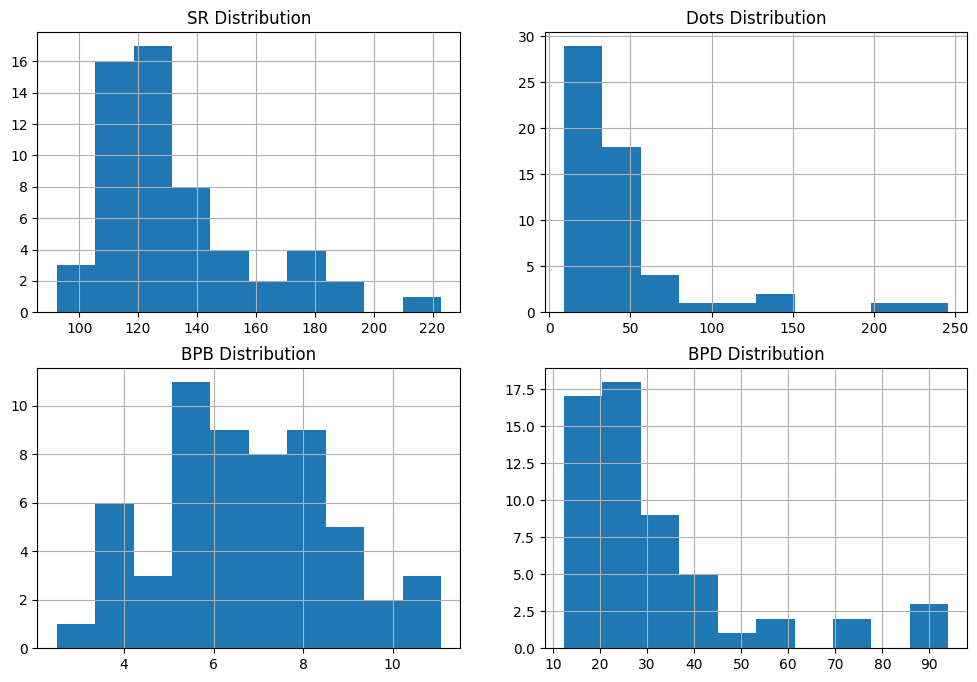

In [131]:
plt.figure(figsize=(12,8))

plt.subplot(221)
wankhede1.SR.hist()
plt.title('SR Distribution')

plt.subplot(222)
wankhede1.dots.hist()
plt.title('Dots Distribution')

plt.subplot(223)
wankhede1.BPB.hist()
plt.title('BPB Distribution')

plt.subplot(224)
wankhede1.BPD.hist()
plt.title('BPD Distribution')

plt.show()

In [87]:
wankhede2=byVenue(overalldata,'Wankhede Stadium','Death Overs')

#####Top 10 Highest Run Scorer in Death Overs at Wankhede 

In [88]:
runs=pd.DataFrame(wankhede2.groupby('batsman')['runs'].sum().sort_values(ascending=False)).reset_index()
inn=pd.DataFrame(wankhede2.groupby(['batsman'])['innings'].sum().sort_values(ascending=False)).reset_index()
balls = pd.DataFrame(wankhede2.groupby(['batsman'])['balls'].sum().sort_values(ascending=False)).reset_index()
dot= pd.DataFrame(wankhede2.groupby(['batsman'])['Dot%'].sum()).reset_index()
data=pd.merge(runs,balls,on='batsman',how='inner').merge(inn,on='batsman',how='inner').merge(dot,on='batsman',how='inner')
print(data.head(10))

           batsman  runs  balls  innings       Dot%
0       KA Pollard   522    295       37  33.898305
1        RG Sharma   375    203       21  24.630542
2        HH Pandya   294    182       20  35.714286
3  Harbhajan Singh   248    154       27  37.012987
4        AT Rayudu   221    127       17  23.622047
5          V Kohli   111     50        4  16.000000
6         MS Dhoni   110     74        7  43.243243
7        YK Pathan   106     66        6  28.787879
8        KH Pandya   106     61        9  34.426230
9       KD Karthik    95     51        6  29.411765


#####Graph Visualization for Death Overs at Wankhede

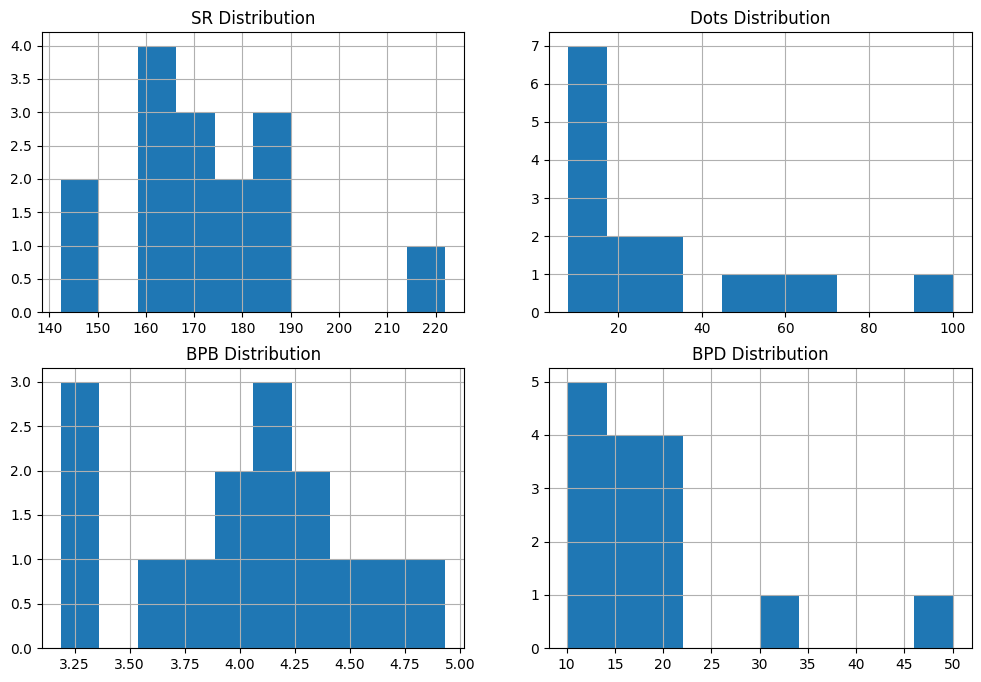

In [130]:
plt.figure(figsize=(12,8))

plt.subplot(221)
wankhede2.SR.hist()
plt.title('SR Distribution')

plt.subplot(222)
wankhede2.dots.hist()
plt.title('Dots Distribution')

plt.subplot(223)
wankhede2.BPB.hist()
plt.title('BPB Distribution')

plt.subplot(224)
wankhede2.BPD.hist()
plt.title('BPD Distribution')

plt.show()

####Batters Comparison after Standarizing all Factors

#####For Wankhede in Middle Overs

In [89]:
wankhede1=wankhede1[(wankhede1.runs > 50) & (wankhede1.balls > 30)]

In [90]:
min_value=min(wankhede1['Dot%'])
max_value=max(wankhede1['Dot%'])

wankhede1['mx_Dot%']=wankhede1['Dot%'].apply(lambda x: ((x-min_value)/(max_value - min_value)))

In [91]:
min_value=min(wankhede1['BPD'])
max_value=max(wankhede1['BPD'])

wankhede1['mx_BPD']=wankhede1['BPD'].apply(lambda x: ((x-min_value)/(max_value - min_value)))

In [92]:
min_value=min(wankhede1['BPB'])
max_value=max(wankhede1['BPB'])

wankhede1['mx_BPB']=wankhede1['BPB'].apply(lambda x: ((x-min_value)/(max_value - min_value)))

In [93]:
min_value=min(wankhede1['SR'])
max_value=max(wankhede1['SR'])

wankhede1['mx_SR']=wankhede1['SR'].apply(lambda x: ((x-min_value)/(max_value - min_value)))

In [94]:
wankhede1['minmax_score']=wankhede1.apply(lambda x: (x['mx_Dot%']*0.20 + x['mx_SR']*0.30 + x['mx_BPD']*0.20 + x['mx_BPB']*0.30),axis=1)

In [95]:
wankhede1.sort_values('minmax_score',ascending=False).head(10)

,batsman,innings,runs,balls,dismissals,dots,fours,sixes,SR,BPD,BPB,Dot%,mx_Dot%,mx_BPD,mx_BPB,mx_SR,minmax_score
74,JEC Franklin,4,104,88,0,27,3,5,118.181818,88.000000,11.000000,30.681818,0.334287,0.926531,0.991031,0.197866,0.608833
88,KL Rahul,3,110,93,1,28,5,4,118.279570,93.000000,10.333333,30.107527,0.313875,0.987755,0.913303,0.198615,0.593902
118,MS Dhoni,14,133,144,7,65,10,3,92.361111,20.571429,11.076923,45.138889,0.848130,0.100875,1.000000,0.000000,0.489801
45,DJ Bravo,7,85,83,2,36,6,3,102.409639,41.500000,9.222222,43.373494,0.785384,0.357143,0.783757,0.077003,0.486733
111,MK Pandey,3,86,75,1,24,7,2,114.666667,75.000000,8.333333,32.000000,0.381139,0.767347,0.680120,0.170929,0.485012
178,SV Samson,4,141,94,1,20,11,4,150.000000,94.000000,6.266667,21.276596,0.000000,1.000000,0.439163,0.441691,0.464256
89,KM Jadhav,5,95,86,2,32,8,2,110.465116,43.000000,8.600000,37.209302,0.566291,0.375510,0.711211,0.138732,0.443343
112,MK Tiwary,4,96,82,2,33,7,4,117.073171,41.000000,7.454545,40.243902,0.674149,0.351020,0.577660,0.189370,0.435143
55,F du Plessis,5,101,96,3,35,7,3,105.208333,32.000000,9.600000,36.458333,0.539600,0.240816,0.827803,0.098449,0.433959
155,RV Uthappa,8,214,182,4,76,21,7,117.582418,45.500000,6.500000,41.758242,0.727973,0.406122,0.466368,0.193273,0.424711


In [96]:
wankhede1.sort_values('minmax_score',ascending=True).head(10)

,batsman,innings,runs,balls,dismissals,dots,fours,sixes,SR,BPD,BPB,Dot%,mx_Dot%,mx_BPD,mx_BPB,mx_SR,minmax_score
179,Shakib Al Hasan,6,87,63,5,19,10,1,138.095238,12.600000,5.727273,30.158730,0.315695,0.003265,0.376274,0.350464,0.281813
5,AB de Villiers,7,198,123,5,33,22,7,160.975610,24.600000,4.241379,26.829268,0.197357,0.150204,0.203031,0.525798,0.288161
159,S Dhawan,6,141,104,5,34,16,3,135.576923,20.800000,5.473684,32.692308,0.405745,0.103673,0.346708,0.331166,0.305246
165,SA Yadav,15,272,220,11,64,26,5,123.636364,20.000000,7.096774,29.090909,0.277742,0.093878,0.535947,0.239664,0.307007
87,KK Nair,4,59,34,2,11,8,2,173.529412,17.000000,3.400000,32.352941,0.393683,0.057143,0.104933,0.621998,0.308245
56,G Gambhir,3,58,47,3,13,5,1,123.404255,15.666667,7.833333,27.659574,0.226868,0.040816,0.621824,0.237886,0.311450
73,JC Buttler,8,207,126,7,40,16,13,164.285714,18.000000,4.344828,31.746032,0.372112,0.069388,0.215092,0.551163,0.318177
13,AM Rahane,6,114,89,5,26,8,4,128.089888,17.800000,7.416667,29.213483,0.282098,0.066939,0.573244,0.273792,0.323918
167,SE Marsh,5,163,110,3,29,14,6,148.181818,36.666667,5.500000,26.363636,0.180807,0.297959,0.349776,0.427758,0.329013
12,AM Nayar,4,51,42,3,12,3,2,121.428571,14.000000,8.400000,28.571429,0.259278,0.020408,0.687892,0.222746,0.329129


In [97]:
wankhede2=wankhede2[(wankhede2.runs > 40) & (wankhede2.balls > 30)]

In [98]:
min_value=min(wankhede2['Dot%'])
max_value=max(wankhede2['Dot%'])

wankhede2['mx_Dot%']=wankhede2['Dot%'].apply(lambda x: (x-min_value)/(max_value - min_value))

In [99]:
min_value=min(wankhede2['BPB'])
max_value=max(wankhede2['BPB'])

wankhede2['mx_BPB']=wankhede2['BPB'].apply(lambda x: (x-min_value)/(max_value - min_value))

In [100]:
min_value=min(wankhede2['BPD'])
max_value=max(wankhede2['BPD'])

wankhede2['mx_BPD']=wankhede2['BPD'].apply(lambda x: (x-min_value)/(max_value - min_value))

In [101]:
min_value=min(wankhede2['SR'])
max_value=max(wankhede2['SR'])

wankhede2['mx_SR']=wankhede2['SR'].apply(lambda x: (x-min_value)/(max_value - min_value))

In [102]:
wankhede2['minmax_score']=wankhede2.apply(lambda x: (x['mx_Dot%']*0.15 + x['mx_SR']*0.35 + x['mx_BPD']*0.15 + x['mx_BPB']*0.35),axis=1)

In [103]:
wankhede2.sort_values('minmax_score',ascending=False).head(10)

,batsman,innings,runs,balls,dismissals,dots,fours,sixes,SR,BPD,BPB,Dot%,mx_Dot%,mx_BPB,mx_BPD,mx_SR,minmax_score
105,MS Dhoni,7,110,74,4,32,6,9,148.648649,18.500000,4.933333,43.243243,0.924925,1.000000,0.209205,0.078220,0.547496
180,V Kohli,4,111,50,0,8,7,8,222.000000,50.000000,3.333333,16.000000,0.000000,0.083532,1.000000,1.000000,0.529236
27,BJ Hodge,3,51,31,1,9,6,1,164.516129,31.000000,4.428571,29.032258,0.442453,0.710876,0.523013,0.277621,0.490794
34,CR Brathwaite,2,58,31,2,13,1,7,187.096774,15.500000,3.875000,41.935484,0.880526,0.393795,0.133891,0.561384,0.486475
96,MJ McClenaghan,8,47,33,2,15,3,4,142.424242,16.500000,4.714286,45.454545,1.000000,0.874531,0.158996,0.000000,0.479935
134,RG Sharma,21,375,203,11,50,21,28,184.729064,18.454545,4.142857,24.630542,0.293012,0.547221,0.208064,0.531630,0.452759
190,YK Pathan,6,106,66,3,19,10,5,160.606061,22.000000,4.400000,28.787879,0.434156,0.694511,0.297071,0.228484,0.432732
19,AT Rayudu,17,221,127,10,30,17,12,174.015748,12.700000,4.379310,23.622047,0.258773,0.682660,0.063598,0.396999,0.426236
37,DA Miller,4,59,33,2,8,4,4,178.787879,16.500000,4.125000,24.242424,0.279835,0.536993,0.158996,0.456969,0.413711
51,HH Pandya,20,294,182,9,65,25,19,161.538462,20.222222,4.136364,35.714286,0.669312,0.543502,0.252441,0.240202,0.412559


In [104]:
wankhede2.sort_values('minmax_score',ascending=True).head(10)

,batsman,innings,runs,balls,dismissals,dots,fours,sixes,SR,BPD,BPB,Dot%,mx_Dot%,mx_BPB,mx_BPD,mx_SR,minmax_score
98,MK Tiwary,4,57,33,2,9,9,1,172.727273,16.500000,3.300000,27.272727,0.382716,0.064439,0.158996,0.380807,0.237093
73,KD Karthik,6,95,51,5,15,12,4,186.274510,10.200000,3.187500,29.411765,0.455338,0.000000,0.000837,0.551051,0.261294
74,KH Pandya,9,106,61,6,21,12,5,173.770492,10.166667,3.588235,34.426230,0.625582,0.229538,0.000000,0.393917,0.312047
53,Harbhajan Singh,27,248,154,13,57,25,13,161.038961,11.846154,4.052632,37.012987,0.713404,0.495541,0.042163,0.233924,0.368648
72,KA Pollard,37,522,295,25,100,33,41,176.949153,11.800000,3.986486,33.898305,0.607659,0.457653,0.041004,0.433862,0.409330
51,HH Pandya,20,294,182,9,65,25,19,161.538462,20.222222,4.136364,35.714286,0.669312,0.543502,0.252441,0.240202,0.412559
37,DA Miller,4,59,33,2,8,4,4,178.787879,16.500000,4.125000,24.242424,0.279835,0.536993,0.158996,0.456969,0.413711
19,AT Rayudu,17,221,127,10,30,17,12,174.015748,12.700000,4.379310,23.622047,0.258773,0.682660,0.063598,0.396999,0.426236
190,YK Pathan,6,106,66,3,19,10,5,160.606061,22.000000,4.400000,28.787879,0.434156,0.694511,0.297071,0.228484,0.432732
134,RG Sharma,21,375,203,11,50,21,28,184.729064,18.454545,4.142857,24.630542,0.293012,0.547221,0.208064,0.531630,0.452759


#####Top 10 Batsman in PP at Eden Gardens

In [105]:
eden=byVenue(overalldata,'Eden Gardens','Powerplay')

In [106]:
runs=pd.DataFrame(eden.groupby('batsman')['runs'].sum().sort_values(ascending=False)).reset_index()
inn=pd.DataFrame(eden.groupby(['batsman'])['innings'].sum().sort_values(ascending=False)).reset_index()
balls = pd.DataFrame(eden.groupby(['batsman'])['balls'].sum().sort_values(ascending=False)).reset_index()
dot= pd.DataFrame(eden.groupby(['batsman'])['Dot%'].sum()).reset_index()
data=pd.merge(runs,balls,on='batsman',how='inner').merge(inn,on='batsman',how='inner').merge(dot,on='batsman',how='inner')
print(data.head(10))

       batsman  runs  balls  innings       Dot%
0    G Gambhir   758    636       46  45.597484
1   RV Uthappa   541    431       37  44.779582
2    SP Narine   298    180       18  52.777778
3      CA Lynn   274    207       16  53.140097
4  BB McCullum   230    193       14  54.404145
5     CH Gayle   205    158       12  55.696203
6    JH Kallis   192    196       16  51.530612
7   SC Ganguly   192    186       12  58.064516
8     S Dhawan   169    137       10  46.715328
9     MS Bisla   156    148       11  52.027027


#####Top 10 Batsman in Middle Overs at Eden Gardens

In [107]:
eden1=byVenue(overalldata,'Eden Gardens','Middle Overs')

In [108]:
runs=pd.DataFrame(eden1.groupby('batsman')['runs'].sum().sort_values(ascending=False)).reset_index()
inn=pd.DataFrame(eden1.groupby(['batsman'])['innings'].sum().sort_values(ascending=False)).reset_index()
balls = pd.DataFrame(eden1.groupby(['batsman'])['balls'].sum().sort_values(ascending=False)).reset_index()
dot= pd.DataFrame(eden1.groupby(['batsman'])['Dot%'].sum()).reset_index()
data=pd.merge(runs,balls,on='batsman',how='inner').merge(inn,on='batsman',how='inner').merge(dot,on='batsman',how='inner')
print(data.head(10))

      batsman  runs  balls  innings       Dot%
0   G Gambhir   606    476       25  28.361345
1  RV Uthappa   536    425       27  34.117647
2   YK Pathan   507    352       28  34.090909
3   MK Pandey   414    352       22  31.818182
4  KD Karthik   384    306       22  36.928105
5   MK Tiwary   340    331       19  38.368580
6      N Rana   314    217       13  38.709677
7  AD Russell   284    178       22  41.573034
8    CH Gayle   277    167        8  38.323353
9   JH Kallis   263    266       15  33.834586


#####Top 10 Batsman in Death Overs at Eden Gardesn

In [109]:
eden2=byVenue(overalldata,'Eden Gardens','Death Overs')

In [110]:
runs=pd.DataFrame(eden2.groupby('batsman')['runs'].sum().sort_values(ascending=False)).reset_index()
inn=pd.DataFrame(eden2.groupby(['batsman'])['innings'].sum().sort_values(ascending=False)).reset_index()
balls = pd.DataFrame(eden2.groupby(['batsman'])['balls'].sum().sort_values(ascending=False)).reset_index()
dot= pd.DataFrame(eden2.groupby(['batsman'])['Dot%'].sum()).reset_index()
data=pd.merge(runs,balls,on='batsman',how='inner').merge(inn,on='batsman',how='inner').merge(dot,on='batsman',how='inner')
print(data.head(10))

           batsman  runs  balls  innings       Dot%
0       AD Russell   415    195       19  34.871795
1        YK Pathan   263    183       24  27.868852
2       KD Karthik   163     89       13  23.595506
3         MS Dhoni   142     78        7  33.333333
4        JH Kallis   122     57        6  17.543860
5        AT Rayudu   117     62        6  27.419355
6        RA Jadeja   116     70        9  25.714286
7  Shakib Al Hasan   105     62        9  25.806452
8         SA Yadav    98     52       11  28.846154
9        RG Sharma    92     47        5  27.659574


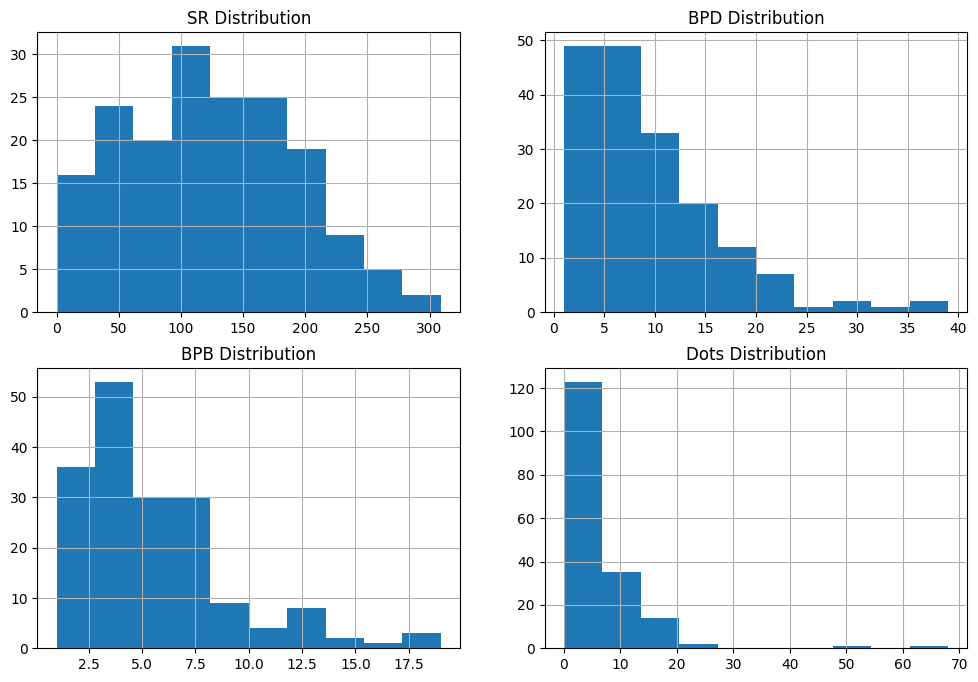

In [111]:
plt.figure(figsize=(12,8))

plt.subplot(221)
eden2.SR.hist()
plt.title('SR Distribution')

plt.subplot(222)
eden2.BPD.hist()
plt.title('BPD Distribution')

plt.subplot(223)
eden2.BPB.hist()
plt.title('BPB Distribution')

plt.subplot(224)
eden2.dots.hist()
plt.title('Dots Distribution')

plt.show()

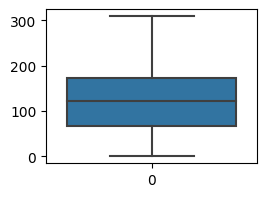

In [112]:
plt.figure(figsize=(6,2))
plt.subplot(121)
sns.boxplot(eden2['SR'])
plt.show()

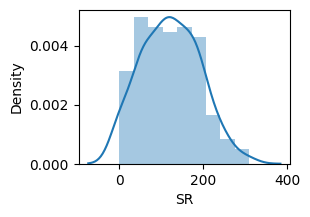

In [113]:
plt.figure(figsize=(6,2))
plt.subplot(122)
sns.distplot(eden2['SR'])
plt.show()

####Top 10 Runscorers for Team

In [114]:
def mostruns(batting_team):
  runs=pd.DataFrame(deliveries[deliveries.batting_team == batting_team].groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False)).reset_index().rename(columns={'batsman_runs':'Runs'})
  inn=pd.DataFrame(deliveries[deliveries.batting_team == batting_team].groupby('batsman')['matchId'].apply(lambda x: len(list(np.unique(x))))).reset_index().rename(columns={'matchId':'Innings'})
  all=runs.merge(inn,on='batsman',how='inner')
  print(all.head(10))

In [115]:
mimostruns=mostruns('Mumbai Indians')

        batsman  Runs  Innings
0     RG Sharma  4711      177
1    KA Pollard  3437      168
2     AT Rayudu  2416      105
3  SR Tendulkar  2334       78
4      SA Yadav  2036       67
5  Ishan Kishan  1551       55
6     HH Pandya  1485       85
7     Q de Kock  1332       43
8     KH Pandya  1143       69
9   LMP Simmons  1079       29


In [116]:
rcbmostruns=mostruns('Royal Challengers Bangalore')

          batsman  Runs  Innings
0         V Kohli  6634      215
1  AB de Villiers  4510      144
2        CH Gayle  3175       84
3       JH Kallis  1132       42
4        R Dravid   898       37
5      D Padikkal   884       29
6      GJ Maxwell   814       27
7        PA Patel   731       32
8   Mandeep Singh   597       31
9      TM Dilshan   587       24


In [117]:
cskmostruns=mostruns('Chennai Super Kings')

        batsman  Runs  Innings
0      SK Raina  4695      171
1      MS Dhoni  4404      178
2  F du Plessis  2721       86
3     AT Rayudu  1774       68
4    MEK Hussey  1768       49
5       M Vijay  1708       69
6   S Badrinath  1441       65
7     RA Jadeja  1440       98
8     SR Watson  1252       43
9    RD Gaikwad  1207       36


In [118]:
def wintoss_winmatch(toss_winner,winner):
  if toss_winner == winner:
    return 1
  else:
    return 0

In [119]:
matches['wintoss_winmatch']=matches.apply(lambda x: wintoss_winmatch(x['toss_winner'],x['winner']),axis=1)

In [120]:
matches.head(10)

,outcome,event,date,gender,reserve_umpire,team1,toss_winner,umpire2,match_referee,season,...,city,tv_umpire,date2,winner,umpire1,match_number,eliminator,winner_wickets,matchId,wintoss_winmatch
0,NaN,Indian Premier League,2017-04-05,male,N Pandit,Sunrisers Hyderabad,Royal Challengers Bangalore,NJ Llong,J Srinath,2017,...,Hyderabad,A Deshmukh,NaN,Sunrisers Hyderabad,AY Dandekar,1.0,NaN,NaN,1082591,0
1,NaN,Indian Premier League,2017-04-06,male,Navdeep Singh,Rising Pune Supergiant,Rising Pune Supergiant,S Ravi,M Nayyar,2017,...,Pune,VK Sharma,NaN,Rising Pune Supergiant,A Nand Kishore,2.0,NaN,7.0,1082592,1
2,NaN,Indian Premier League,2017-04-07,male,K Srinivasan,Gujarat Lions,Kolkata Knight Riders,CK Nandan,V Narayan Kutty,2017,...,Rajkot,YC Barde,NaN,Kolkata Knight Riders,Nitin Menon,3.0,NaN,10.0,1082593,1
3,NaN,Indian Premier League,2017-04-08,male,R Pandit,Kings XI Punjab,Kings XI Punjab,C Shamshuddin,Chinmay Sharma,2017,...,Indore,KN Ananthapadmanabhan,NaN,Kings XI Punjab,AK Chaudhary,4.0,NaN,6.0,1082594,1
4,NaN,Indian Premier League,2017-04-08,male,Navdeep Singh,Royal Challengers Bangalore,Royal Challengers Bangalore,VK Sharma,J Srinath,2017,...,Bengaluru,A Nand Kishore,NaN,Royal Challengers Bangalore,S Ravi,5.0,NaN,NaN,1082595,1
5,NaN,Indian Premier League,2017-04-09,male,N Pandit,Sunrisers Hyderabad,Sunrisers Hyderabad,NJ Llong,M Nayyar,2017,...,Hyderabad,AY Dandekar,NaN,Sunrisers Hyderabad,A Deshmukh,6.0,NaN,9.0,1082596,1
6,NaN,Indian Premier League,2017-04-09,male,K Srinivasan,Mumbai Indians,Mumbai Indians,CK Nandan,S Chaturvedi,2017,...,Mumbai,YC Barde,NaN,Mumbai Indians,Nitin Menon,7.0,NaN,4.0,1082597,1
7,NaN,Indian Premier League,2017-04-10,male,R Pandit,Kings XI Punjab,Royal Challengers Bangalore,C Shamshuddin,Chinmay Sharma,2017,...,Indore,KN Ananthapadmanabhan,NaN,Kings XI Punjab,AK Chaudhary,8.0,NaN,8.0,1082598,0
8,NaN,Indian Premier League,2017-04-11,male,Navdeep Singh,Rising Pune Supergiant,Rising Pune Supergiant,S Ravi,J Srinath,2017,...,Pune,A Nand Kishore,NaN,Delhi Daredevils,AY Dandekar,9.0,NaN,NaN,1082599,0
9,NaN,Indian Premier League,2017-04-12,male,K Srinivasan,Mumbai Indians,Mumbai Indians,CK Nandan,M Nayyar,2017,...,Mumbai,YC Barde,NaN,Mumbai Indians,Nitin Menon,10.0,NaN,4.0,1082600,1


In [121]:
len(matches)

950

In [122]:
seasonhistory=pd.DataFrame(matches.groupby('season')['wintoss_winmatch'].sum()/matches.groupby('season')['wintoss_winmatch'].count()).reset_index().rename(columns={'wintoss_winmatch':'Win%'})
seasonhistory

,season,Win%
0,2007/08,0.482759
1,2009,0.578947
2,2009/10,0.516667
3,2011,0.520548
4,2012,0.445946
5,2013,0.460526
6,2014,0.483333
7,2015,0.457627
8,2016,0.566667
9,2017,0.576271


In [123]:
overalldata['total_runs']=overalldata.apply(lambda x:(x['batsman_runs']+x['extras']),axis=1)

In [124]:
overalldata.groupby('venue')['total_runs'].sum().sort_values(ascending=False).head(10)

venue
Eden Gardens                                  23658
Wankhede Stadium                              23407
M Chinnaswamy Stadium                         20263
Feroz Shah Kotla                              18421
MA Chidambaram Stadium, Chepauk               15277
Rajiv Gandhi International Stadium, Uppal     14888
Dubai International Cricket Stadium           14450
Sawai Mansingh Stadium                        14264
Punjab Cricket Association Stadium, Mohali    10987
Wankhede Stadium, Mumbai                      10301
Name: total_runs, dtype: int64

In [125]:
avgscore=(overalldata.groupby('venue')['total_runs'].sum().sort_values(ascending=False)/overalldata.groupby(['venue'])['matchId'].apply(lambda x: len(list(np.unique(x)))*2))
avgscore.sort_values(ascending=False).head(10)

venue
Eden Gardens, Kolkata                           194.750000
Arun Jaitley Stadium, Delhi                     188.625000
Brabourne Stadium                               174.050000
Punjab Cricket Association IS Bindra Stadium    173.800000
Brabourne Stadium, Mumbai                       171.294118
M.Chinnaswamy Stadium                           170.900000
Saurashtra Cricket Association Stadium          166.650000
Wankhede Stadium, Mumbai                        166.145161
Dr DY Patil Sports Academy, Mumbai              164.325000
Barabati Stadium                                162.714286
dtype: float64